# Cleaning US Census Data

You just got hired as a Data Analyst at the Census Bureau, which collects census data and creates interesting visualizations and insights from it.

The person who had your job before you left you all the data they had for the most recent census. It is in multiple `csv` files. They didn't use pandas, they would just look through these `csv` files manually whenever they wanted to find something. Sometimes they would copy and paste certain numbers into Excel to make charts.

The thought of it makes you shiver. This is not scalable or repeatable.

Your boss wants you to make some scatterplots and histograms by the end of the day. Can you get this data into `pandas` and into reasonable shape so that you can make these histograms?

## Clean and Shape the Data!

In [1708]:
# - demographic info by state
# - yes they can help us make the scatterplot

In [1709]:
import glob
import pandas as pd

demographic_files = glob.glob("states*.csv")
demographic_files

['states0.csv',
 'states1.csv',
 'states2.csv',
 'states3.csv',
 'states4.csv',
 'states5.csv',
 'states6.csv',
 'states7.csv',
 'states8.csv',
 'states9.csv']

In [1710]:
df_list = []
for file in demographic_files:
    df_list.append(pd.read_csv(file))

len(df_list)        #prints: 10

## concat all files, drop the unnamed column, and reset index
us_census = pd.concat(df_list).drop(columns='Unnamed: 0').reset_index(drop=True)

us_census.info()
us_census

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   State      60 non-null     object
 1   TotalPop   60 non-null     int64 
 2   Hispanic   60 non-null     object
 3   White      60 non-null     object
 4   Black      60 non-null     object
 5   Native     60 non-null     object
 6   Asian      60 non-null     object
 7   Pacific    55 non-null     object
 8   Income     60 non-null     object
 9   GenderPop  60 non-null     object
dtypes: int64(1), object(9)
memory usage: 4.8+ KB


,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,"$43,296.36",2341093M_2489527F
1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,"$70,354.74",384160M_349215F
2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,"$54,207.82",3299088M_3342840F
3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,"$41,935.63",1451913M_1506295F
4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,"$67,264.78",19087135M_19334329F
5,Colorado,5278906,20.78%,69.90%,3.55%,0.57%,2.66%,NaN,"$64,657.80",2648667M_2630239F
6,Colorado,5278906,20.78%,69.90%,3.55%,0.57%,2.66%,NaN,"$64,657.80",2648667M_2630239F
7,Connecticut,3593222,15.60%,67.68%,10.35%,0.13%,4.02%,0.02%,"$76,146.56",1751607M_1841615F
8,Delaware,926454,8.82%,64.63%,20.74%,0.26%,3.27%,NaN,"$61,827.98",448413M_478041F
9,District of Columbia,647484,9.17%,33.10%,51.78%,0.20%,3.38%,0.03%,"$75,466.36",306674M_340810F


In [1711]:
## check for duplicates
us_census.duplicated(subset=us_census.columns[1:]).value_counts()

False    51
True      9
dtype: int64

In [1712]:
## drop duplicates
us_census = us_census.drop_duplicates()

us_census.info()
us_census

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 59
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   State      51 non-null     object
 1   TotalPop   51 non-null     int64 
 2   Hispanic   51 non-null     object
 3   White      51 non-null     object
 4   Black      51 non-null     object
 5   Native     51 non-null     object
 6   Asian      51 non-null     object
 7   Pacific    47 non-null     object
 8   Income     51 non-null     object
 9   GenderPop  51 non-null     object
dtypes: int64(1), object(9)
memory usage: 4.4+ KB


,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,"$43,296.36",2341093M_2489527F
1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,"$70,354.74",384160M_349215F
2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,"$54,207.82",3299088M_3342840F
3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,"$41,935.63",1451913M_1506295F
4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,"$67,264.78",19087135M_19334329F
5,Colorado,5278906,20.78%,69.90%,3.55%,0.57%,2.66%,NaN,"$64,657.80",2648667M_2630239F
7,Connecticut,3593222,15.60%,67.68%,10.35%,0.13%,4.02%,0.02%,"$76,146.56",1751607M_1841615F
8,Delaware,926454,8.82%,64.63%,20.74%,0.26%,3.27%,NaN,"$61,827.98",448413M_478041F
9,District of Columbia,647484,9.17%,33.10%,51.78%,0.20%,3.38%,0.03%,"$75,466.36",306674M_340810F
10,Florida,19645772,21.34%,59.08%,15.17%,0.21%,2.28%,0.05%,"$50,690.19",9600009M_10045763F


In [1713]:
## test
# us_census = us_census[['State', 'TotalPop']]
# us_census.columns[:2]

In [1714]:
## split genderpop column into M and F pop columns, make the values numeric, and get rid of GenderPop column
genderPop_split = us_census['GenderPop'].str.split('_')
genderpop_columns = ['MalePop', 'FemalePop']
for i in range(2):
    us_census[genderpop_columns[i]] = pd.to_numeric(genderPop_split.str.get(i).replace(to_replace=['\D'], value='', regex=True))

us_census = us_census.drop(columns='GenderPop')

us_census.info()
us_census

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 59
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   State      51 non-null     object 
 1   TotalPop   51 non-null     int64  
 2   Hispanic   51 non-null     object 
 3   White      51 non-null     object 
 4   Black      51 non-null     object 
 5   Native     51 non-null     object 
 6   Asian      51 non-null     object 
 7   Pacific    47 non-null     object 
 8   Income     51 non-null     object 
 9   MalePop    51 non-null     int64  
 10  FemalePop  49 non-null     float64
dtypes: float64(1), int64(2), object(8)
memory usage: 4.8+ KB


C:\Users\WangarY\AppData\Local\Temp\ipykernel_32196\1381000965.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_census[genderpop_columns[i]] = pd.to_numeric(genderPop_split.str.get(i).replace(to_replace=['\D'], value='', regex=True))
C:\Users\WangarY\AppData\Local\Temp\ipykernel_32196\1381000965.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_census[genderpop_columns[i]] = pd.to_numeric(genderPop_split.str.get(i).replace(to_replace=['\D'], value='', regex=True))


,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,MalePop,FemalePop
0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,"$43,296.36",2341093,2489527.0
1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,"$70,354.74",384160,349215.0
2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,"$54,207.82",3299088,3342840.0
3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,"$41,935.63",1451913,1506295.0
4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,"$67,264.78",19087135,19334329.0
5,Colorado,5278906,20.78%,69.90%,3.55%,0.57%,2.66%,NaN,"$64,657.80",2648667,2630239.0
7,Connecticut,3593222,15.60%,67.68%,10.35%,0.13%,4.02%,0.02%,"$76,146.56",1751607,1841615.0
8,Delaware,926454,8.82%,64.63%,20.74%,0.26%,3.27%,NaN,"$61,827.98",448413,478041.0
9,District of Columbia,647484,9.17%,33.10%,51.78%,0.20%,3.38%,0.03%,"$75,466.36",306674,340810.0
10,Florida,19645772,21.34%,59.08%,15.17%,0.21%,2.28%,0.05%,"$50,690.19",9600009,10045763.0


In [1715]:
## test to see whether total pop = male + female pop
# us_census['totpop'] = us_census['MalePop'] + us_census['FemalePop']
# us_census.head()

In [1716]:
## fill in the NaN values in FemalePop w TotalPop - MalePop & change FemalePop datatype to int
us_census['FemalePop'] = us_census['FemalePop'].fillna(
    value=(us_census['TotalPop'] - us_census['MalePop'])).astype('int64')

us_census.info()
us_census

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 59
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   State      51 non-null     object
 1   TotalPop   51 non-null     int64 
 2   Hispanic   51 non-null     object
 3   White      51 non-null     object
 4   Black      51 non-null     object
 5   Native     51 non-null     object
 6   Asian      51 non-null     object
 7   Pacific    47 non-null     object
 8   Income     51 non-null     object
 9   MalePop    51 non-null     int64 
 10  FemalePop  51 non-null     int64 
dtypes: int64(3), object(8)
memory usage: 4.8+ KB


,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,MalePop,FemalePop
0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,"$43,296.36",2341093,2489527
1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,"$70,354.74",384160,349215
2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,"$54,207.82",3299088,3342840
3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,"$41,935.63",1451913,1506295
4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,"$67,264.78",19087135,19334329
5,Colorado,5278906,20.78%,69.90%,3.55%,0.57%,2.66%,NaN,"$64,657.80",2648667,2630239
7,Connecticut,3593222,15.60%,67.68%,10.35%,0.13%,4.02%,0.02%,"$76,146.56",1751607,1841615
8,Delaware,926454,8.82%,64.63%,20.74%,0.26%,3.27%,NaN,"$61,827.98",448413,478041
9,District of Columbia,647484,9.17%,33.10%,51.78%,0.20%,3.38%,0.03%,"$75,466.36",306674,340810
10,Florida,19645772,21.34%,59.08%,15.17%,0.21%,2.28%,0.05%,"$50,690.19",9600009,10045763


In [1717]:
## convert Male and FemPop columns to proportions and get rid of the female and male pop columns
us_census['MalePop(%)'] = round(us_census['MalePop']*100 / us_census['TotalPop'], 1)
us_census['FemalePop(%)'] = round(us_census['FemalePop']*100 / us_census['TotalPop'], 1)

us_census = us_census.drop(columns=genderpop_columns)
us_census.info()
us_census

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 59
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         51 non-null     object 
 1   TotalPop      51 non-null     int64  
 2   Hispanic      51 non-null     object 
 3   White         51 non-null     object 
 4   Black         51 non-null     object 
 5   Native        51 non-null     object 
 6   Asian         51 non-null     object 
 7   Pacific       47 non-null     object 
 8   Income        51 non-null     object 
 9   MalePop(%)    51 non-null     float64
 10  FemalePop(%)  51 non-null     float64
dtypes: float64(2), int64(1), object(8)
memory usage: 4.8+ KB


,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,MalePop(%),FemalePop(%)
0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,"$43,296.36",48.5,51.5
1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,"$70,354.74",52.4,47.6
2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,"$54,207.82",49.7,50.3
3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,"$41,935.63",49.1,50.9
4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,"$67,264.78",49.7,50.3
5,Colorado,5278906,20.78%,69.90%,3.55%,0.57%,2.66%,NaN,"$64,657.80",50.2,49.8
7,Connecticut,3593222,15.60%,67.68%,10.35%,0.13%,4.02%,0.02%,"$76,146.56",48.7,51.3
8,Delaware,926454,8.82%,64.63%,20.74%,0.26%,3.27%,NaN,"$61,827.98",48.4,51.6
9,District of Columbia,647484,9.17%,33.10%,51.78%,0.20%,3.38%,0.03%,"$75,466.36",47.4,52.6
10,Florida,19645772,21.34%,59.08%,15.17%,0.21%,2.28%,0.05%,"$50,690.19",48.9,51.1


In [1718]:
## melt Race % Pop columns into one column (variables as seperate columns and rows as seperate observation)
us_census = pd.melt(frame=us_census,
    id_vars=['State', 'TotalPop', 'MalePop(%)', 'FemalePop(%)', 'Income'], value_vars=list(us_census.columns)[2:8],
    var_name='Race', value_name='RacePop(%)')

us_census.info()
us_census.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         306 non-null    object 
 1   TotalPop      306 non-null    int64  
 2   MalePop(%)    306 non-null    float64
 3   FemalePop(%)  306 non-null    float64
 4   Income        306 non-null    object 
 5   Race          306 non-null    object 
 6   RacePop(%)    302 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 16.9+ KB


,State,TotalPop,MalePop(%),FemalePop(%),Income,Race,RacePop(%)
0,Alabama,4830620,48.5,51.5,"$43,296.36",Hispanic,3.75%
1,Alaska,733375,52.4,47.6,"$70,354.74",Hispanic,5.91%
2,Arizona,6641928,49.7,50.3,"$54,207.82",Hispanic,29.57%
3,Arkansas,2958208,49.1,50.9,"$41,935.63",Hispanic,6.22%
4,California,38421464,49.7,50.3,"$67,264.78",Hispanic,37.29%


In [1719]:
## convert Income and RacePop(%) values to floats
column_subset2 = ['Income', 'RacePop(%)']
for column in column_subset2:
    us_census[column] = pd.to_numeric(us_census[column].replace(to_replace=['\%|\$|,'], value='', regex=True))     # have to include regex param

us_census.info()
us_census.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         306 non-null    object 
 1   TotalPop      306 non-null    int64  
 2   MalePop(%)    306 non-null    float64
 3   FemalePop(%)  306 non-null    float64
 4   Income        306 non-null    float64
 5   Race          306 non-null    object 
 6   RacePop(%)    302 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 16.9+ KB


,State,TotalPop,MalePop(%),FemalePop(%),Income,Race,RacePop(%)
0,Alabama,4830620,48.5,51.5,43296.36,Hispanic,3.75
1,Alaska,733375,52.4,47.6,70354.74,Hispanic,5.91
2,Arizona,6641928,49.7,50.3,54207.82,Hispanic,29.57
3,Arkansas,2958208,49.1,50.9,41935.63,Hispanic,6.22
4,California,38421464,49.7,50.3,67264.78,Hispanic,37.29


In [1720]:
## test to see whether sum of RacePop(%) for a state = 100 - to figure out what to replace the missing Pacific RacePop(%) with
# pop_perc_sum_Alabama = us_census['RacePop(%)'][us_census['State'] == 'Alabama'].sum()
# pop_perc_sum_Alabama        #prints: 98.41
## doesn't add up to 100% so might have to replace the missing Pacific RacePop(%) values w sth else

In [1721]:
# replace null Pacific RacePop(%) values w avg Pacific RacePop(%) values
mean_PacificPop_perc = round(us_census['RacePop(%)'][us_census['Race'] == 'Pacific'].mean(), 2)

us_census['RacePop(%)'] = us_census['RacePop(%)'].fillna(value=mean_PacificPop_perc)

us_census.info()
us_census.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         306 non-null    object 
 1   TotalPop      306 non-null    int64  
 2   MalePop(%)    306 non-null    float64
 3   FemalePop(%)  306 non-null    float64
 4   Income        306 non-null    float64
 5   Race          306 non-null    object 
 6   RacePop(%)    306 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 16.9+ KB


,State,TotalPop,MalePop(%),FemalePop(%),Income,Race,RacePop(%)
0,Alabama,4830620,48.5,51.5,43296.36,Hispanic,3.75
1,Alaska,733375,52.4,47.6,70354.74,Hispanic,5.91
2,Arizona,6641928,49.7,50.3,54207.82,Hispanic,29.57
3,Arkansas,2958208,49.1,50.9,41935.63,Hispanic,6.22
4,California,38421464,49.7,50.3,67264.78,Hispanic,37.29


In [1722]:
us_census.describe()

,TotalPop,MalePop(%),FemalePop(%),Income,RacePop(%)
count,3.060000e+02,306.000000,306.000000,306.000000,306.000000
mean,6.265067e+06,49.300000,50.700000,55922.667255,16.225752
std,6.959793e+06,0.826448,0.826448,11385.437183,25.902011
min,6.266040e+05,47.400000,47.600000,20720.540000,0.000000
25%,1.851420e+06,48.700000,50.300000,48100.850000,0.435000
50%,4.397353e+06,49.200000,50.800000,54207.820000,3.350000
75%,6.985464e+06,49.700000,51.300000,64290.750000,16.075000
max,3.842146e+07,52.400000,52.600000,78765.400000,98.890000


In [1723]:
us_census.value_counts()

State                 TotalPop  MalePop(%)  FemalePop(%)  Income    Race      RacePop(%)
Alabama               4830620   48.5        51.5          43296.36  Asian     1.05          1
North Carolina        9845333   48.7        51.3          49937.46  Native    1.09          1
North Dakota          721640    51.0        49.0          58188.11  Pacific   0.31          1
                                                                    Native    5.65          1
                                                                    Hispanic  2.83          1
                                                                    Black     1.28          1
                                                                    Asian     0.96          1
North Carolina        9845333   48.7        51.3          49937.46  White     64.60         1
                                                                    Pacific   0.05          1
                                                                 

In [1724]:
# pd.options.display.max_rows = len(us_census)+1
display(us_census)

,State,TotalPop,MalePop(%),FemalePop(%),Income,Race,RacePop(%)
0,Alabama,4830620,48.5,51.5,43296.36,Hispanic,3.75
1,Alaska,733375,52.4,47.6,70354.74,Hispanic,5.91
2,Arizona,6641928,49.7,50.3,54207.82,Hispanic,29.57
3,Arkansas,2958208,49.1,50.9,41935.63,Hispanic,6.22
4,California,38421464,49.7,50.3,67264.78,Hispanic,37.29
5,Colorado,5278906,50.2,49.8,64657.80,Hispanic,20.78
6,Connecticut,3593222,48.7,51.3,76146.56,Hispanic,15.60
7,Delaware,926454,48.4,51.6,61827.98,Hispanic,8.82
8,District of Columbia,647484,47.4,52.6,75466.36,Hispanic,9.17
9,Florida,19645772,48.9,51.1,50690.19,Hispanic,21.34


## Make Plots

In [1725]:
import matplotlib.pyplot as plt
import seaborn as sns

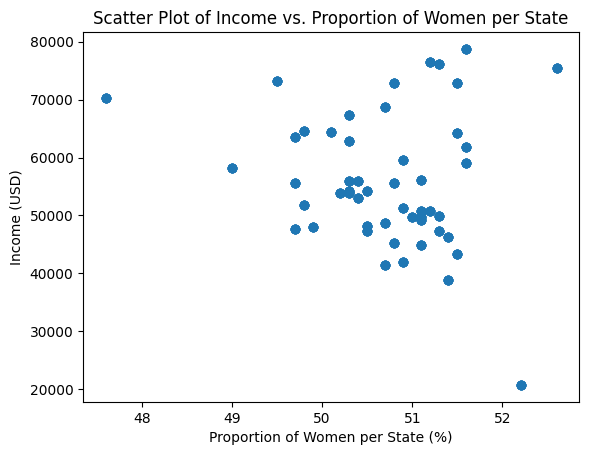

<Figure size 640x480 with 0 Axes>

In [1726]:
## scatter plot of avg income in a state vs prop of women in that state
plt.scatter(data=us_census, x='FemalePop(%)', y='Income')
plt.title("Scatter Plot of Income vs. Proportion of Women per State")
plt.xlabel("Proportion of Women per State (%)")
plt.ylabel("Income (USD)")
plt.show()
plt.clf()

In [1730]:
## test
# us_census_Alabama = us_census[us_census['State']=='Alabama']
# us_census_Alabama

,State,TotalPop,MalePop(%),FemalePop(%),Income,Race,RacePop(%)
0,Alabama,4830620,48.5,51.5,43296.36,Hispanic,3.75
51,Alabama,4830620,48.5,51.5,43296.36,White,61.88
102,Alabama,4830620,48.5,51.5,43296.36,Black,31.25
153,Alabama,4830620,48.5,51.5,43296.36,Native,0.45
204,Alabama,4830620,48.5,51.5,43296.36,Asian,1.05
255,Alabama,4830620,48.5,51.5,43296.36,Pacific,0.03


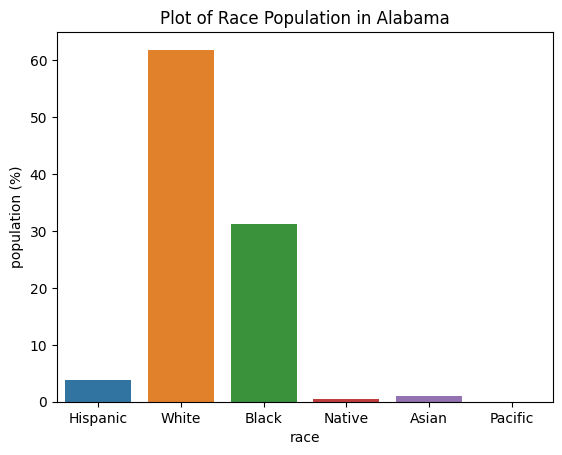

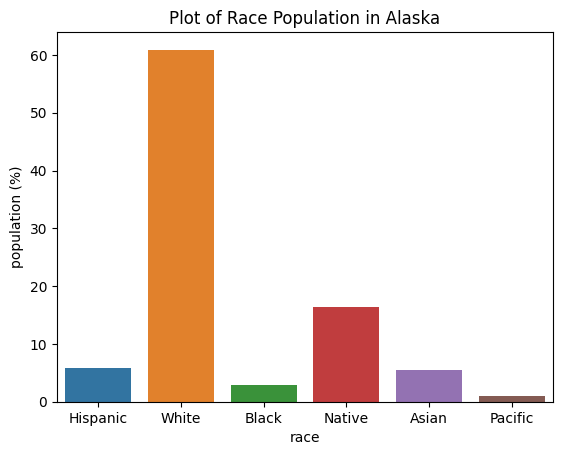

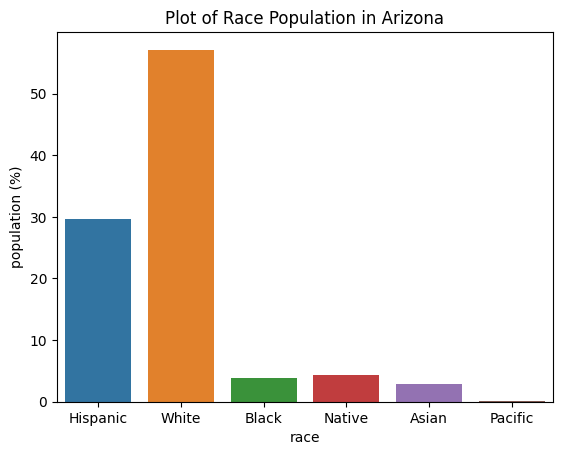

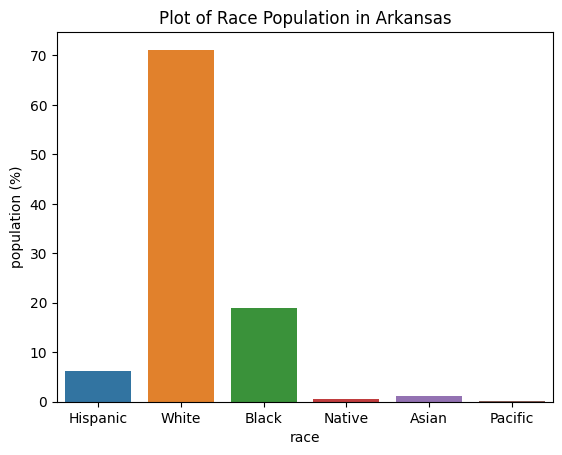

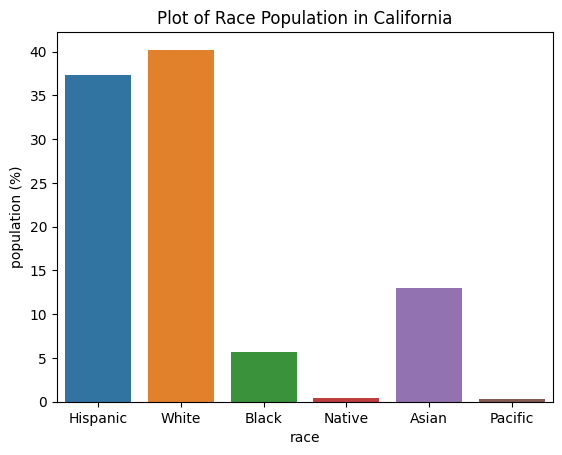

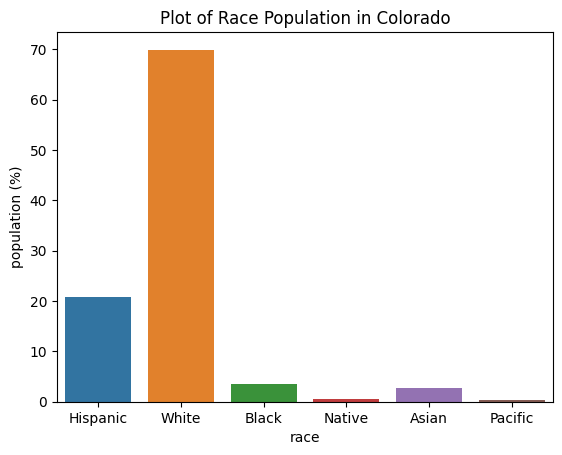

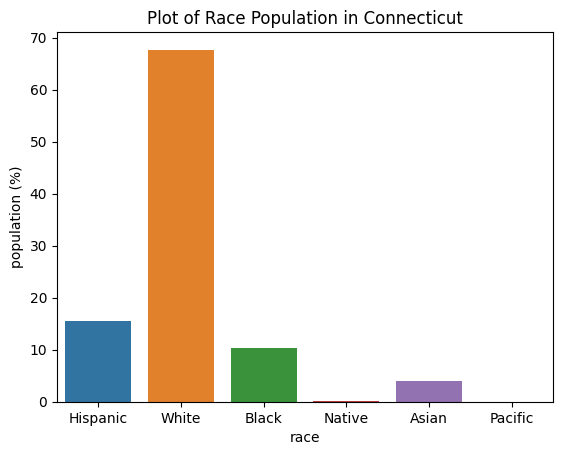

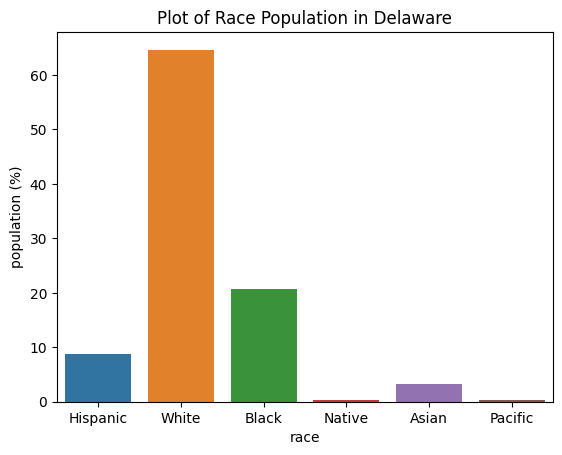

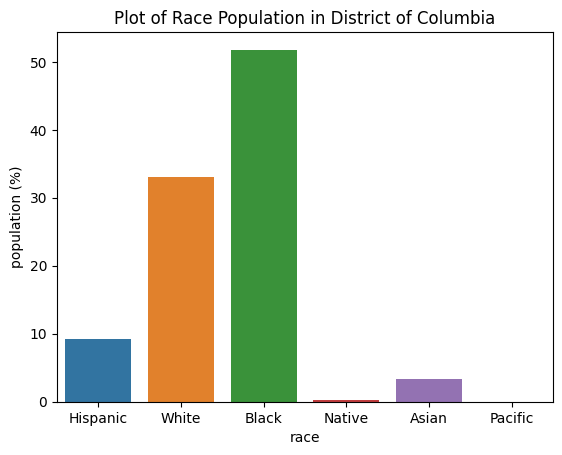

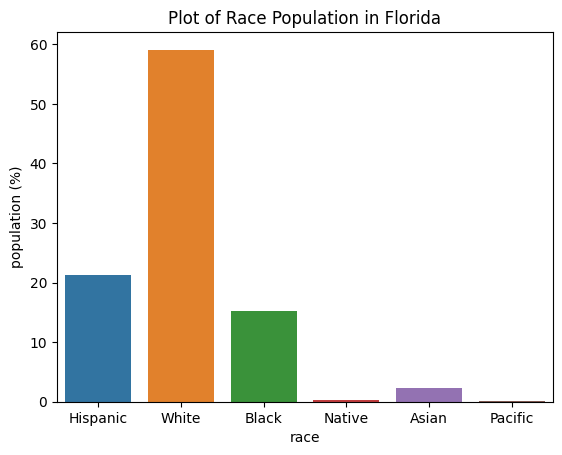

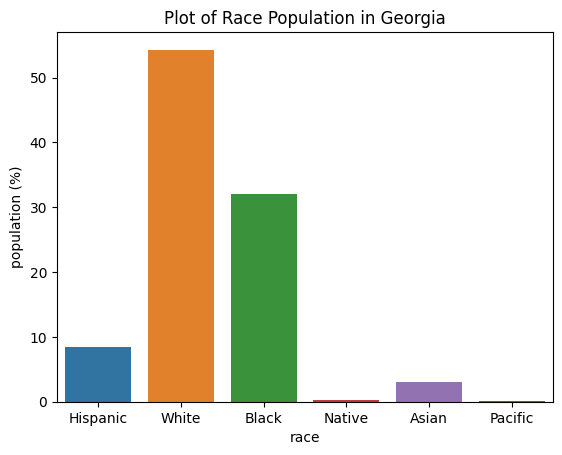

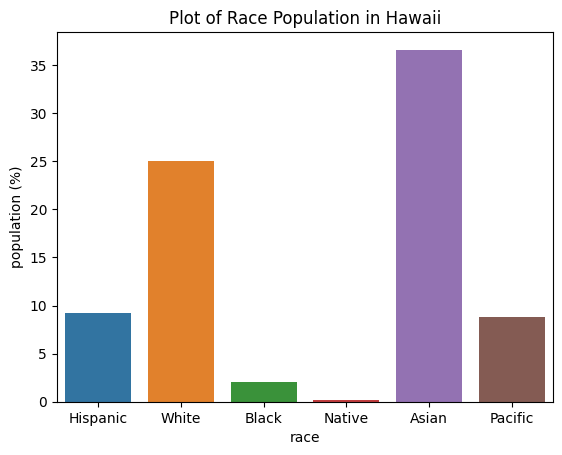

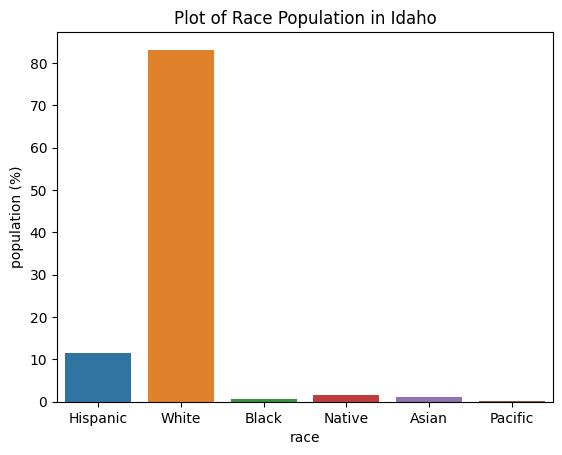

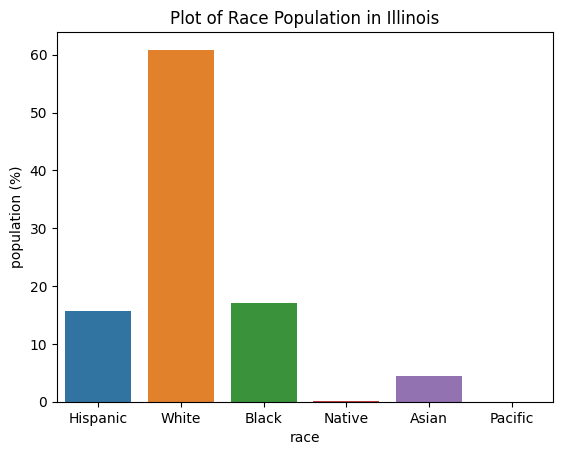

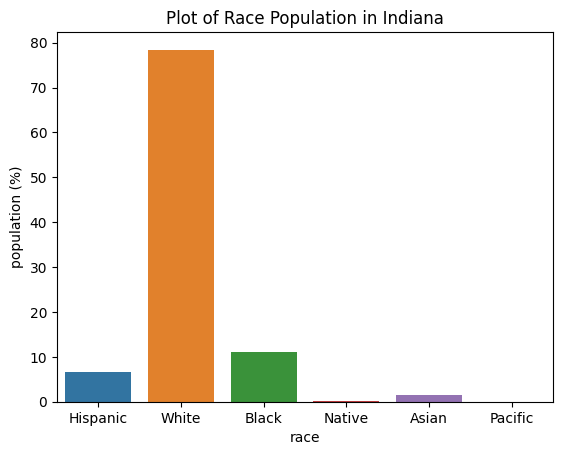

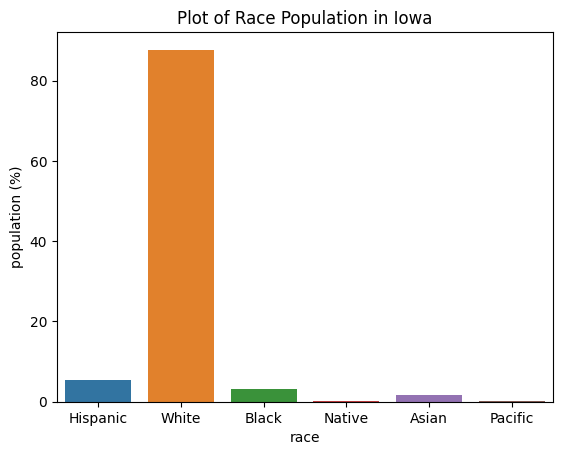

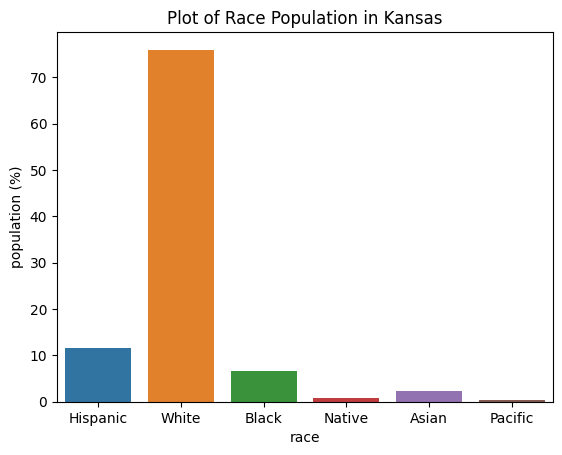

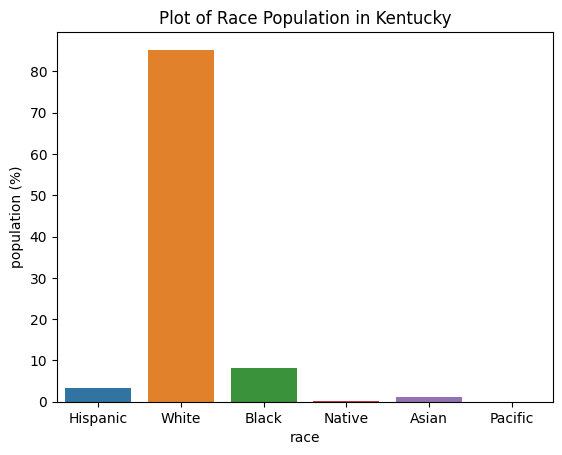

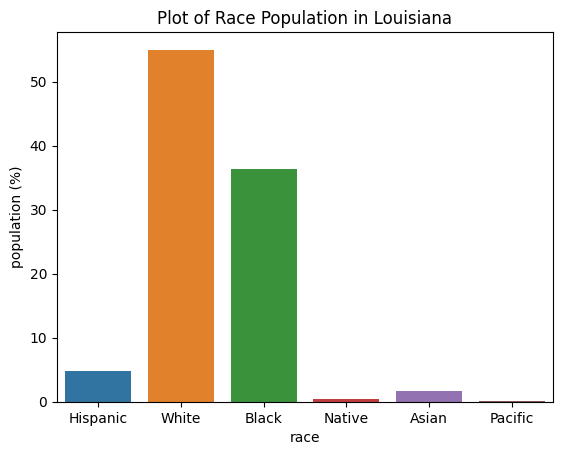

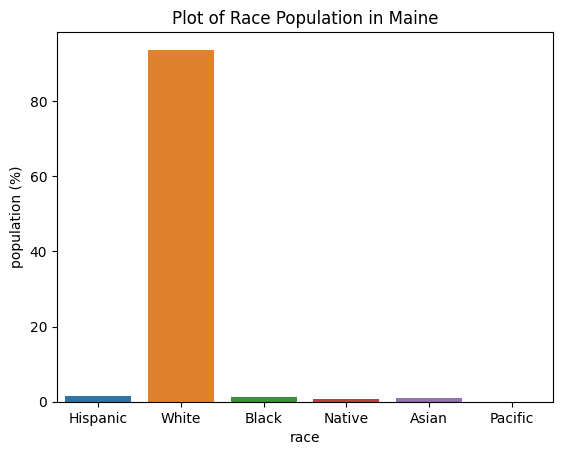

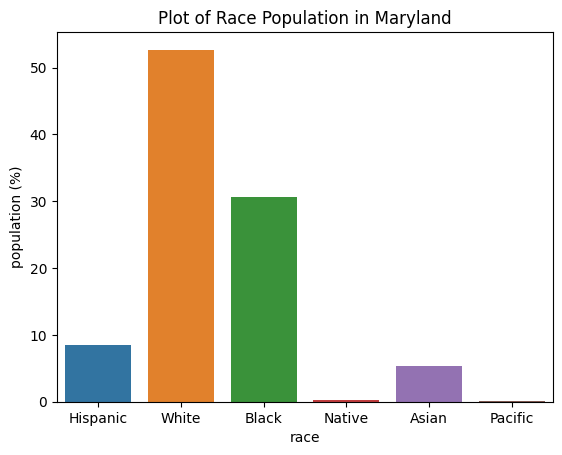

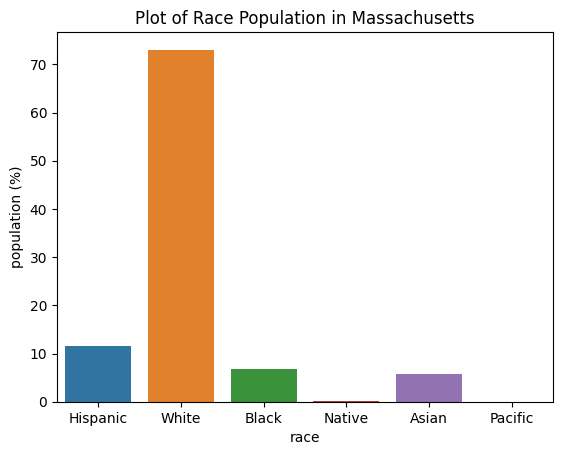

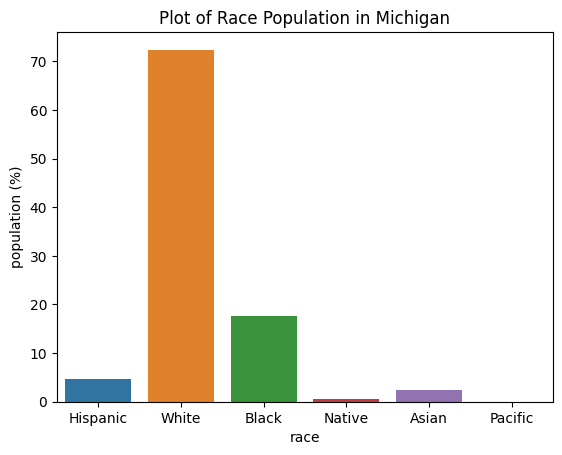

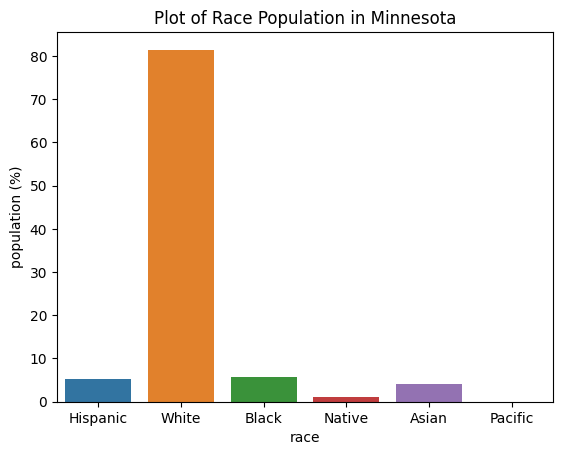

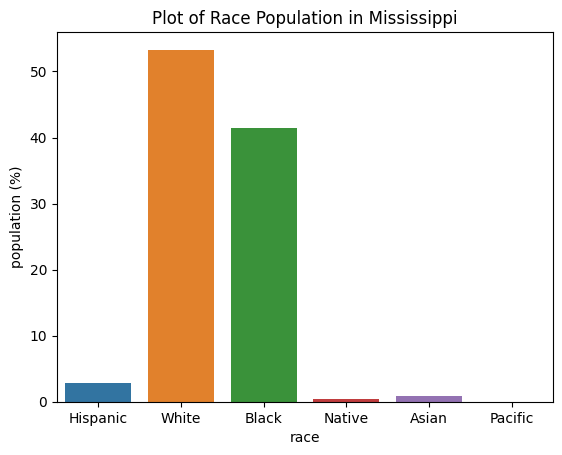

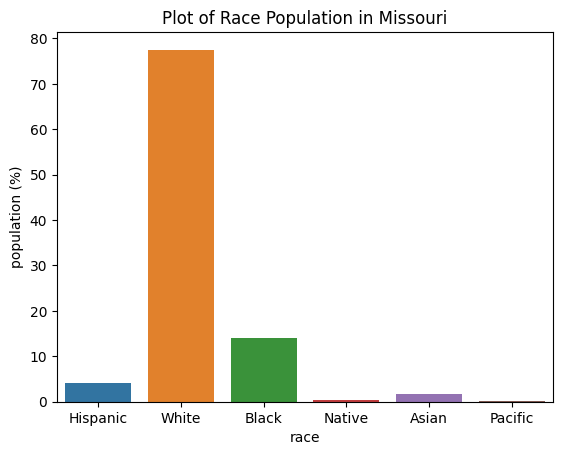

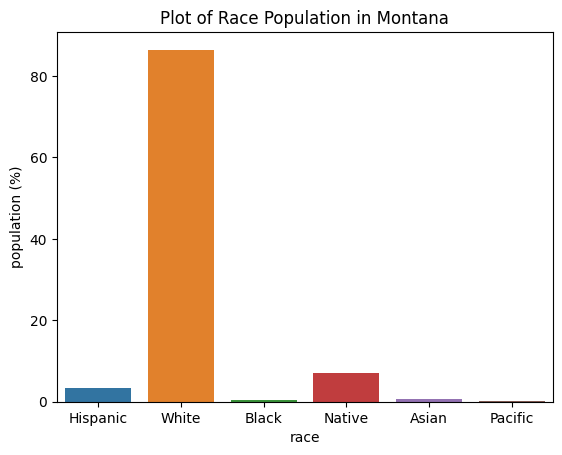

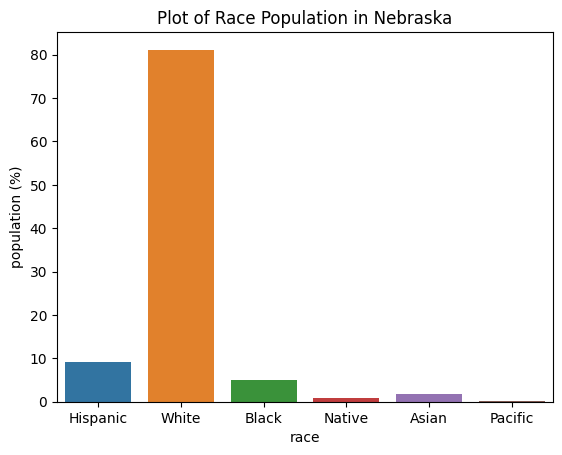

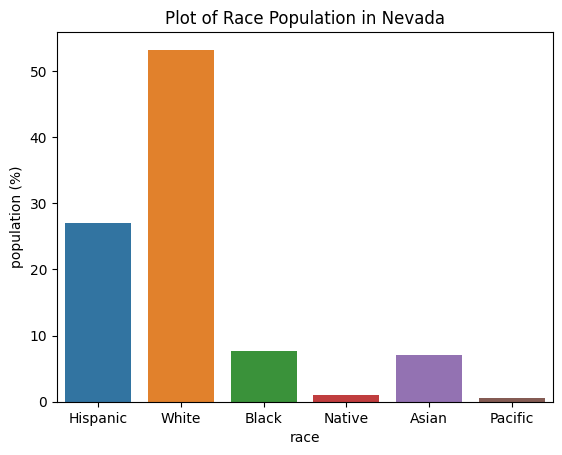

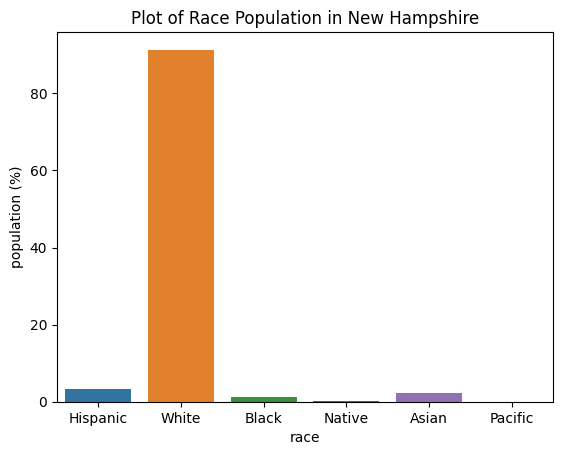

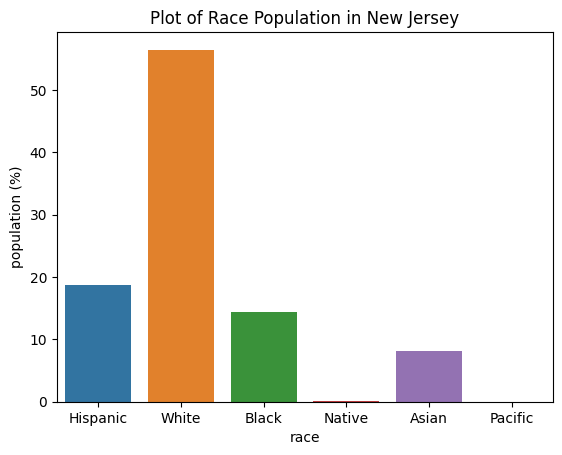

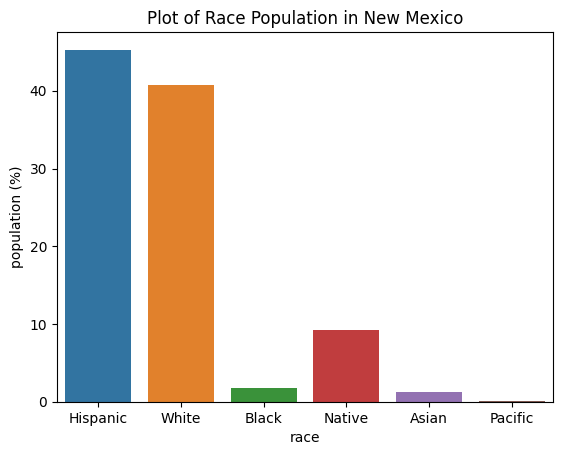

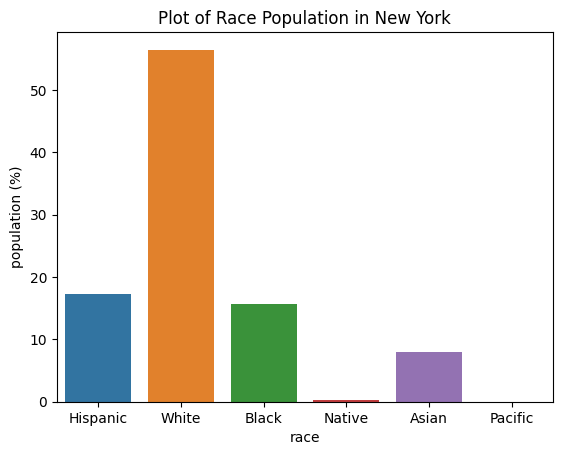

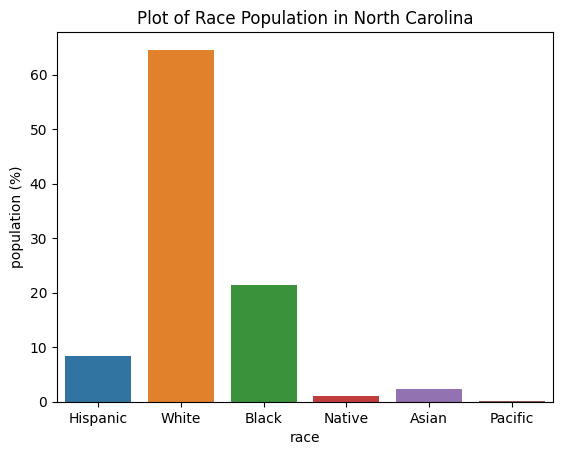

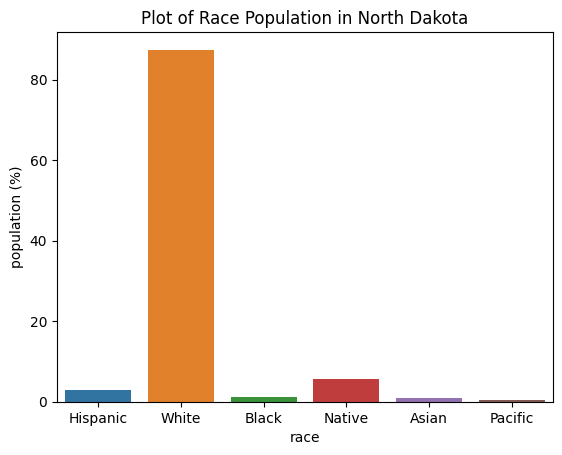

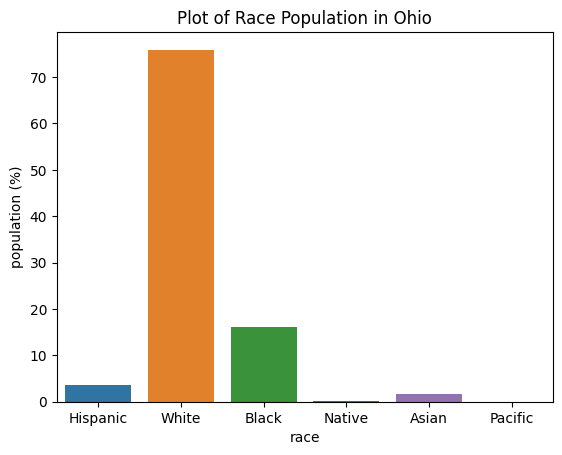

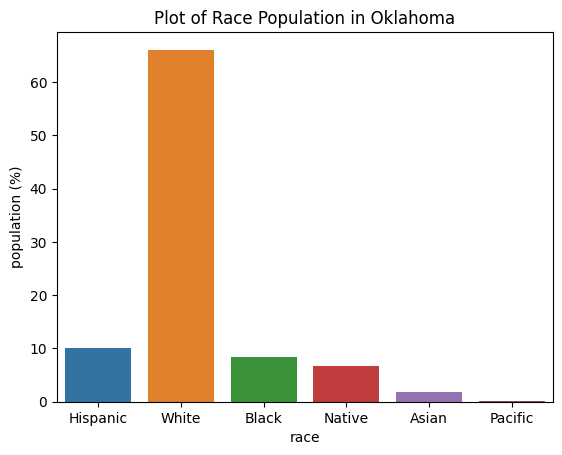

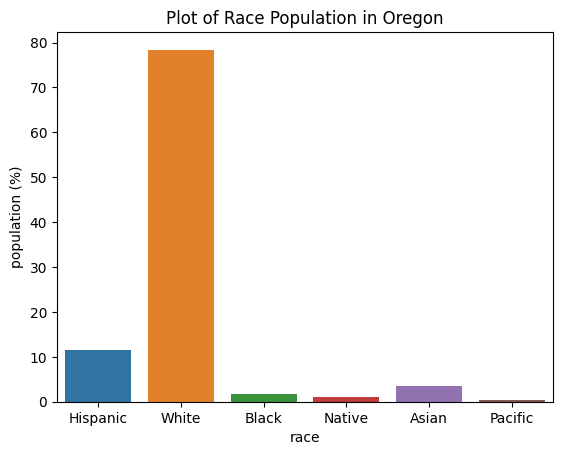

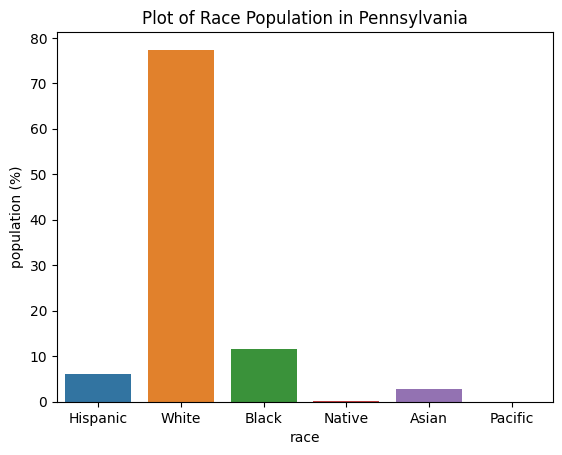

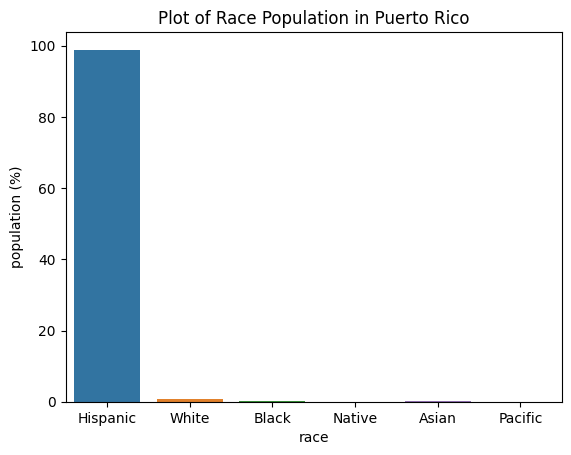

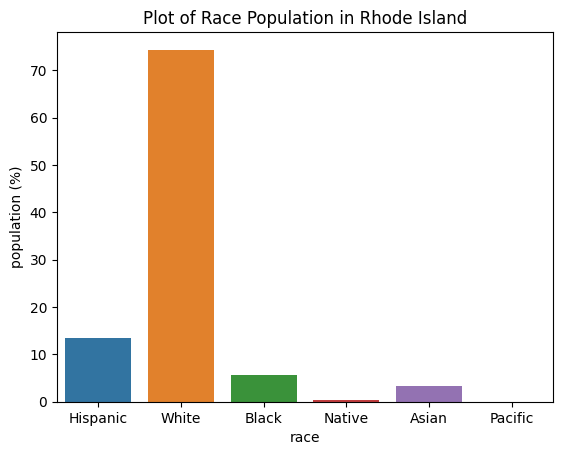

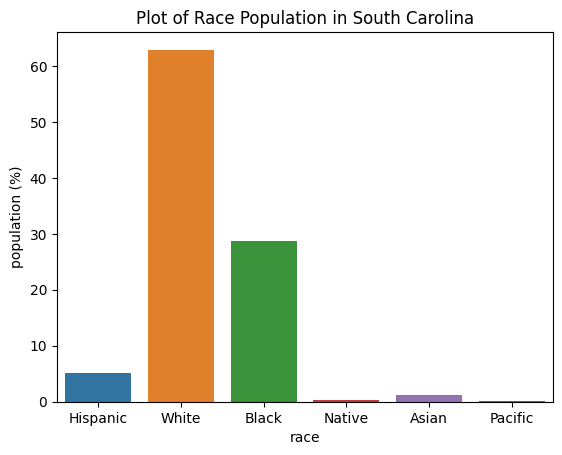

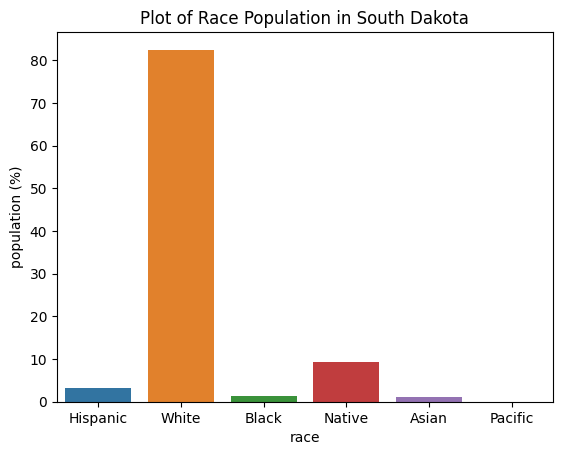

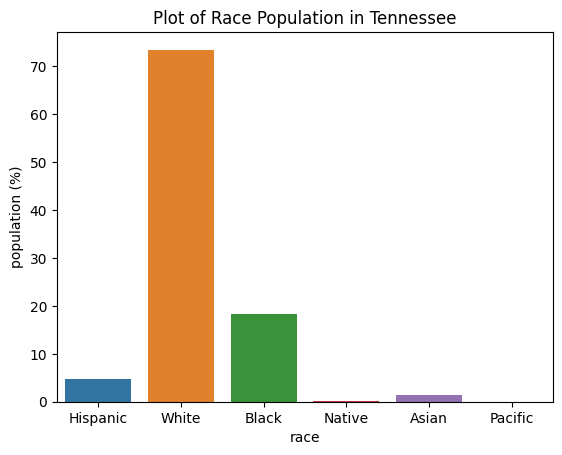

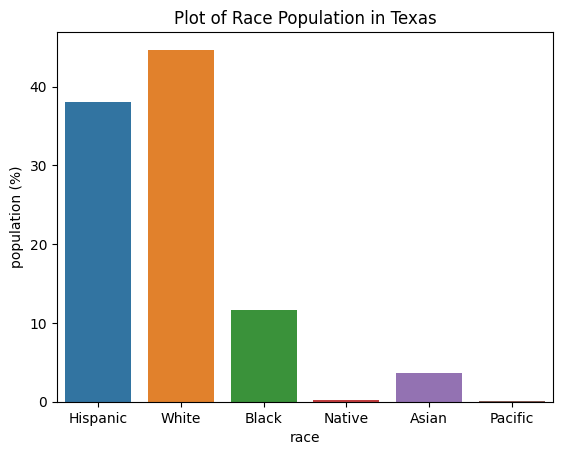

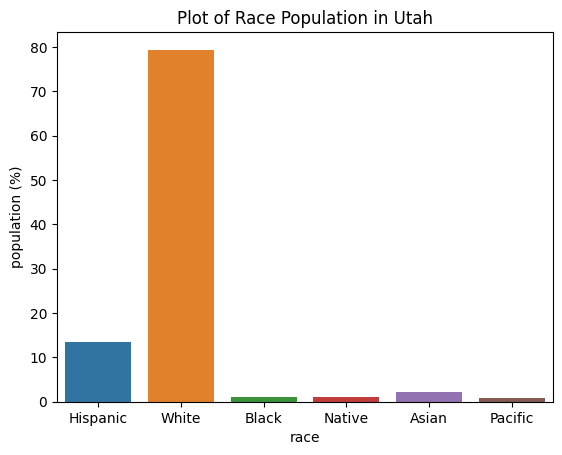

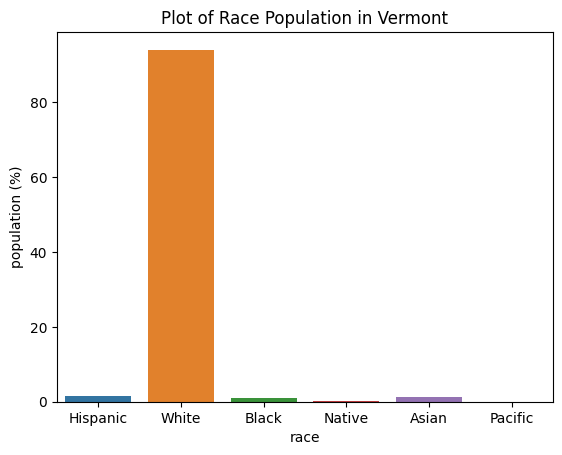

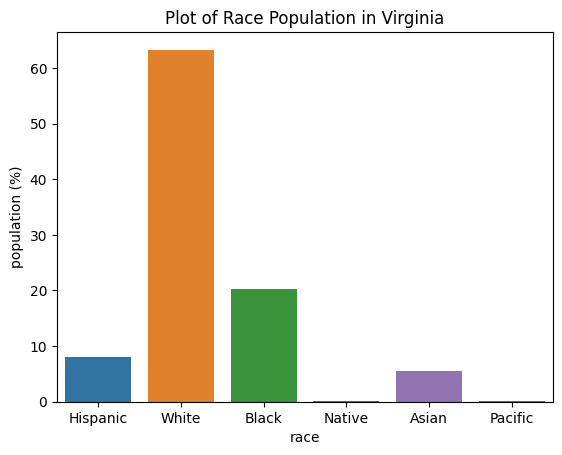

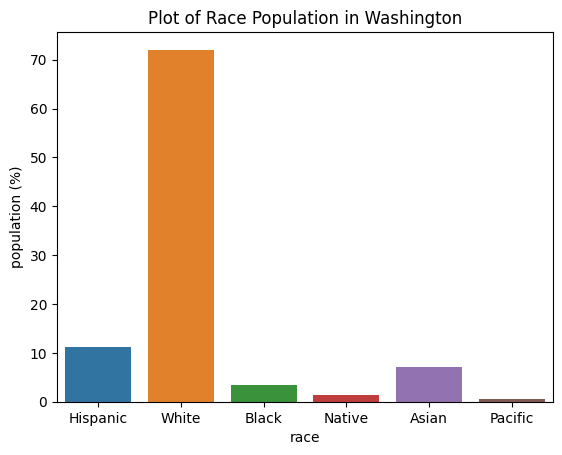

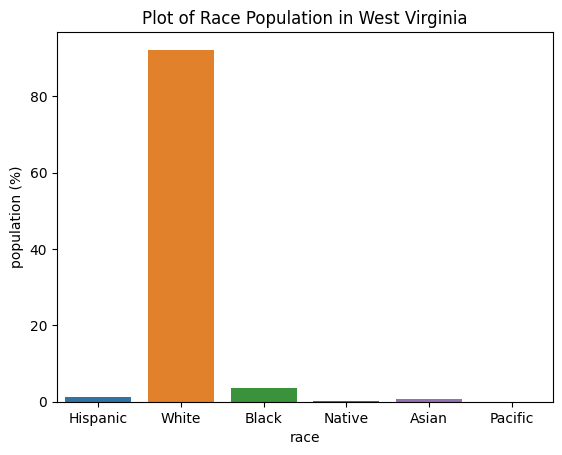

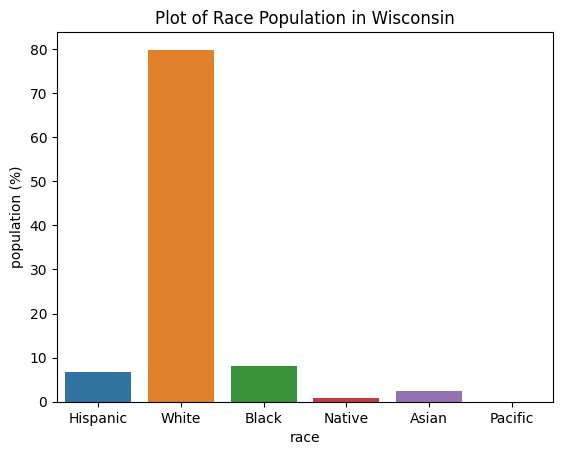

<Figure size 640x480 with 0 Axes>

In [1731]:
## make a bunch of barplots out of the race data
states = us_census['State'].unique().tolist()
# states
for state in states:
    data_to_plot = us_census[us_census['State']==state]
    sns.barplot(data=data_to_plot, x='Race', y='RacePop(%)')
    plt.title(f"Plot of Race Population in {state}")
    plt.xlabel("race")
    plt.ylabel("population (%)")
    plt.show()
    plt.clf()

In [1732]:
us_census[us_census['Race']=='Hispanic']

,State,TotalPop,MalePop(%),FemalePop(%),Income,Race,RacePop(%)
0,Alabama,4830620,48.5,51.5,43296.36,Hispanic,3.75
1,Alaska,733375,52.4,47.6,70354.74,Hispanic,5.91
2,Arizona,6641928,49.7,50.3,54207.82,Hispanic,29.57
3,Arkansas,2958208,49.1,50.9,41935.63,Hispanic,6.22
4,California,38421464,49.7,50.3,67264.78,Hispanic,37.29
5,Colorado,5278906,50.2,49.8,64657.80,Hispanic,20.78
6,Connecticut,3593222,48.7,51.3,76146.56,Hispanic,15.60
7,Delaware,926454,48.4,51.6,61827.98,Hispanic,8.82
8,District of Columbia,647484,47.4,52.6,75466.36,Hispanic,9.17
9,Florida,19645772,48.9,51.1,50690.19,Hispanic,21.34


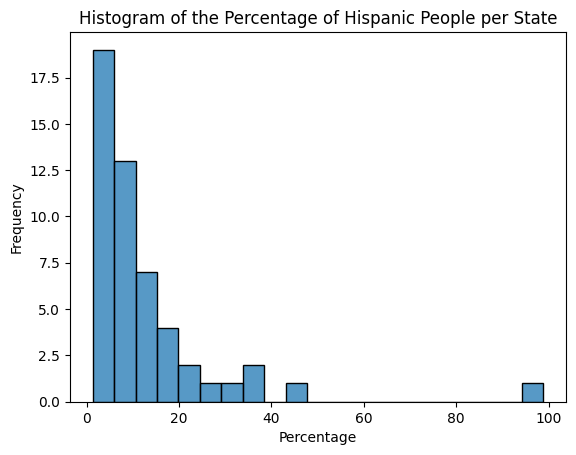

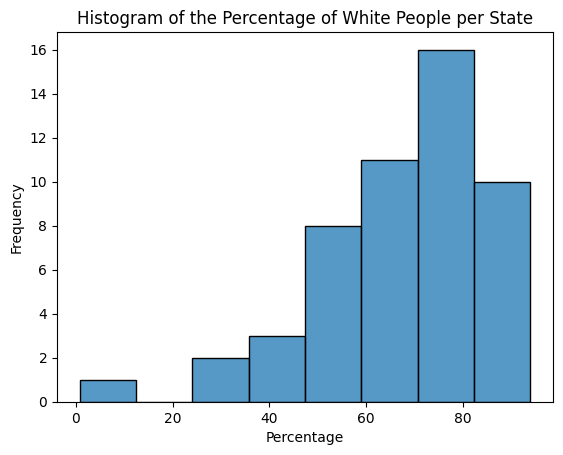

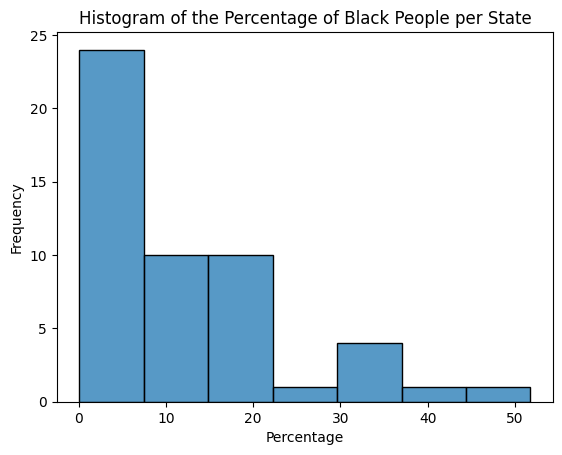

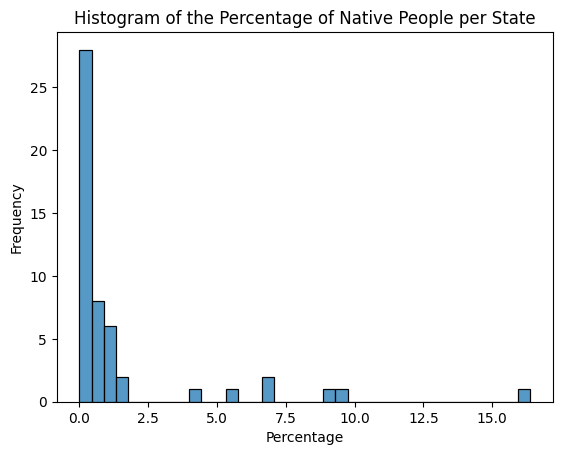

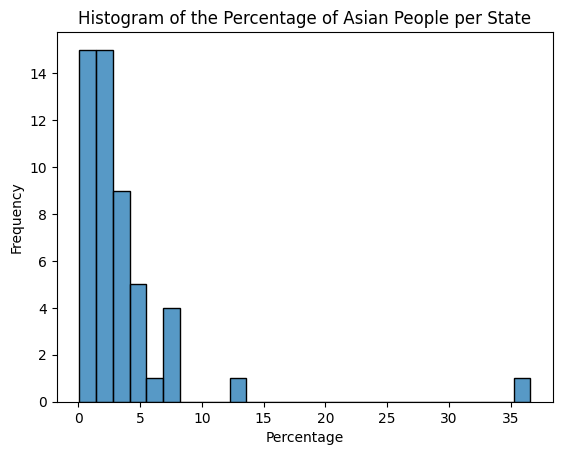

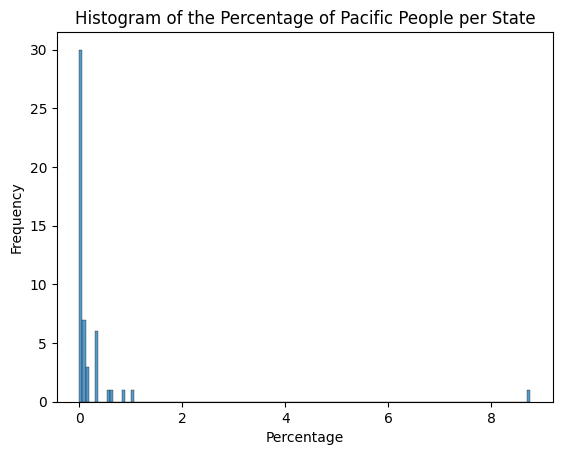

<Figure size 640x480 with 0 Axes>

In [1733]:
## make a bunch of (seaborn) histograms out of the race data
races = us_census['Race'].unique().tolist()
# races
for race in races:
    data_to_plot = us_census[us_census['Race']==race]
    sns.histplot(data=data_to_plot, x='RacePop(%)', stat='count')
    plt.title(f"Histogram of the Percentage of {race} People per State")
    plt.xlabel("Percentage")
    plt.ylabel("Frequency")
    plt.show()
    plt.clf()

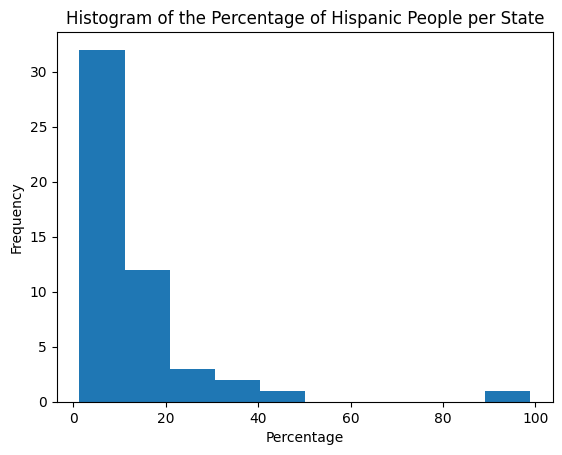

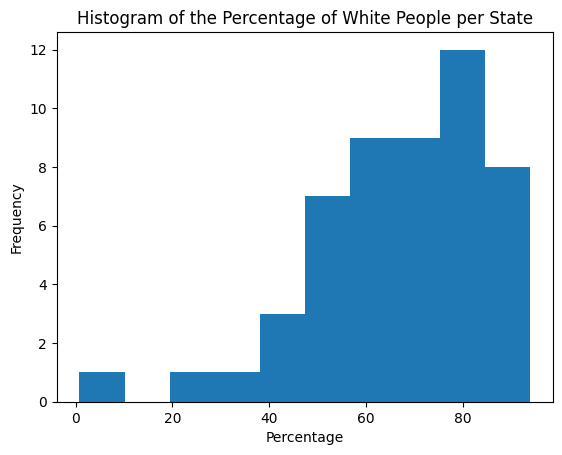

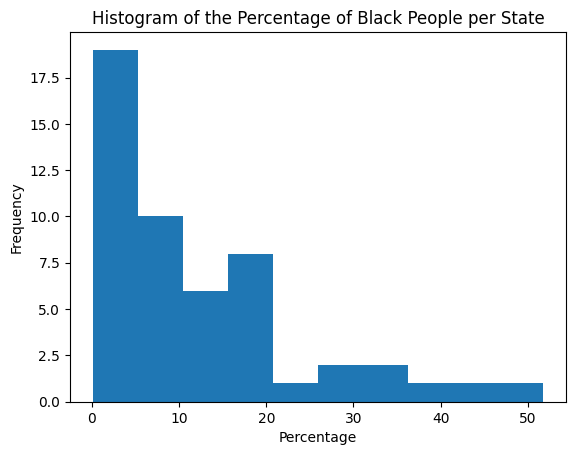

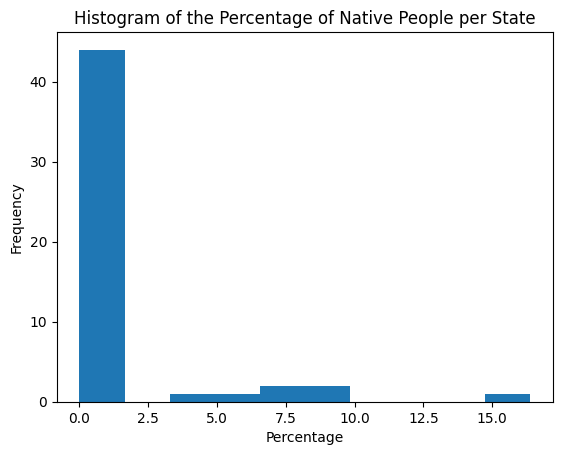

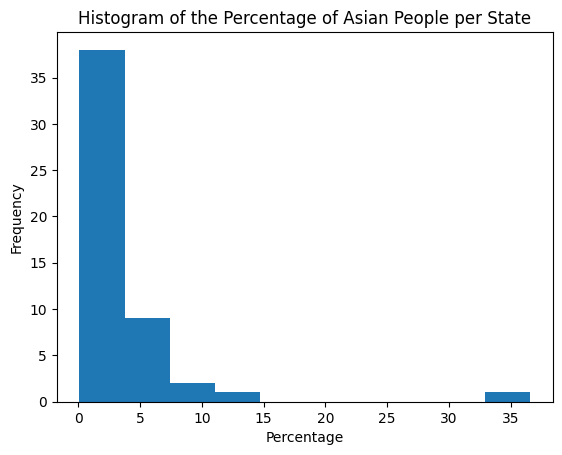

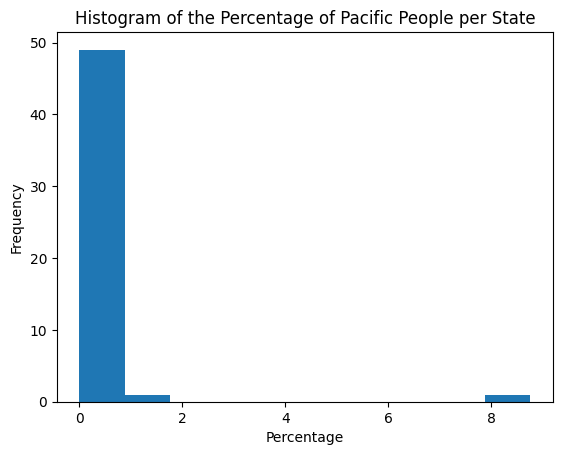

<Figure size 640x480 with 0 Axes>

In [1734]:
## make a bunch of (plt) histograms out of the race data
for race in races:
    data_to_plot = us_census[us_census['Race']==race]
    plt.hist(data=data_to_plot, x='RacePop(%)', density=False)
    plt.title(f"Histogram of the Percentage of {race} People per State")
    plt.xlabel("Percentage")
    plt.ylabel("Frequency")
    plt.show()
    plt.clf()